




![Kickstarter_logo](./images/tq0sfld-kickstarter-logo-green.png)

Launched in 2009, **Kickstarter** is one of the world's leading crowdfunding platforms. As of December 2019, Kickstarter has received more than $4.6 billion in pledges from 17.2 million backers to fund 445,000 projects, such as films, music, stage shows, comics, journalism, video games, technology, publishing, and food-related projects. It's mission is to bring "*creative projects to life*"

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project.
A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not.

## Objective of the Analysis 

1. Primary **business objective** is to provide creators with a recommendation on how to launch a successful Kickstarter campaign! 

2. Determine which factors decide whether or not a project will achieved is funding goal. 

### How do we define a "successful" Project? 

Success in the context of the Kickstarter Dataset is defined as achieving the funding goal.

## Project Requirements: 

1. Try different (at least 3) machine learning algorithms to check which performs best on the problem at hand
2. What would be the right performance metric- precision, recall, accuracy, F1 score, or something else? (Check TPR?)

**Hint**: Check for Data imbalance


## Description of the Dataset 

**'backers_count':** Number of folks who pledge money to join creators in bringing projects to life

**'blurb':** Description of the project / company

**'category':** Describes the topic of the project (e.g. music, fashion)

**'converted_pledged_amount':** Amount of money pledged, converted to the currency on the `current_currency`column 

**'country':** Country where the project creators originates from 

**'created_at':** Date and time when the project was initially created on Kickstarter

**'creator':** The person or team behind the project idea, working to bring it to life

**'currency':** Name of original currency 

**'currency_symbol':** corresponding currency symbol

**'currency_trailing_code':** ?

**'current_currency':** Currency after the conversion has taken place

**'deadline':** Final crowdfunding date

**'disable_communication':** whether or not a project creator is able to communicate with they backers

**'friends':** unclear, null or empty

**'fx_rate':** Foreign exchange rate between the original currency and the current currency

**'goal':** The amount of money that a creator needs to complete their project. Minimum requirement for the project to be financed

**'id':** Project ID

**'is_backing':** 

**'is_starrable':** provides the option to leave a star review

**'is_starred':** has received a star review

**'launched_at':** state and time when the project was launched for funding at Kickstarter

**'location':** Contains the town or city of the project creator

**'name':** Name of the campaign

**'permissions':** unclear; is either NA or empty in the dataset

**'photo':** contains a link and information to the projects photos

**'pledged':** Amount pledged by the contributors in the original currency 

**'profile':** Details about the projects profile including ID number and various visual settings

**'slug':** Name of the project with hyphens and lowercase letters instead of spaces and uppercase letters

**'source_url':** link to the project category on the Kickstarter website

**'spotlight':** Option to put the campaign in a spotlight via a landing page on Kickstarter after it has been successfully financed

**'staff_pick':** Whether a project was handpicked and highlighted by the Kickstarter team. These projects are displayed favorably on the Kickstarter page.

**'state':** Status of the campaign that can be classified into one of the following categories:
   * *'successful'*: project has achieved the funding goal and is neither canceled or suspended. (only classified as successful after the deadline has passed?)
   * *'failed'*: project has failed to achieve the funding goal within the deadline
   * *'live'*: Campaign are classified as live when they are still ongoing regardless of whether they have already achieved the funding goal or not
   * *'suspended'*: A project may be suspended if the Trust & Safety team uncovers evidence that it is in violation of Kickstarter's rules
   * *'canceled'*: A project may be canceled if the creator wants to make any major changes to the project, such as the funding goal or campaign duration, or likes to rework the idea and start again
   
**'state_changed_at':** Date and time when a project status was changed (e.g. from live to successful / failed)

**'static_usd_rate':** Conversion rate between the original currency and USD

**'urls':** link to the creator's campaign on Kickstarter

**'usd_pledged':** Pledged amount converted to USD done by Kickstarter

**'usd_type':** unclear, classifies either as domestic or international 

##  Import Libaries

In [242]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import time
import calendar
import datetime
import itertools

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, plot_confusion_matrix
from sklearn.metrics import roc_curve, accuracy_score, precision_recall_curve, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

%matplotlib inline
sns.set_theme(palette="rocket")
sns.set_context("paper", rc={"font.size":10,"axes.titlesize":12,"axes.labelsize":10})

##  Import the Datasets

We have a total of 55 csv documents which combined make up our dataset. In a first step, we will load and concatenate all of the csv files into one dataframe. 

In [2]:
import glob

In [3]:
df = pd.concat([pd.read_csv(i) for i in glob.glob("data/Kickstarter*.csv")], ignore_index=True)

In [4]:
import pandas as pd

In [5]:
df.shape

(209222, 37)

**Remark:**
Our combined Kickstarter dataset has a total of 209222 observations and 37 columns.  

## Data Cleaning

### Understanding the dataset

In [6]:
df.head(2).T

,0,1
backers_count,315,47
blurb,Babalus Shoes,A colorful Dia de los Muertos themed oracle de...
category,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...","{""id"":273,""name"":""Playing Cards"",""slug"":""games..."
converted_pledged_amount,28645,1950
country,US,US
created_at,1541459205,1501684093
creator,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...","{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":..."
currency,USD,USD
currency_symbol,$,$
currency_trailing_code,True,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
backers_count               209222 non-null int64
blurb                       209214 non-null object
category                    209222 non-null object
converted_pledged_amount    209222 non-null int64
country                     209222 non-null object
created_at                  209222 non-null int64
creator                     209222 non-null object
currency                    209222 non-null object
currency_symbol             209222 non-null object
currency_trailing_code      209222 non-null bool
current_currency            209222 non-null object
deadline                    209222 non-null int64
disable_communication       209222 non-null bool
friends                     300 non-null object
fx_rate                     209222 non-null float64
goal                        209222 non-null float64
id                          209222 non-null int64
is_backing                  300 

**Commentary**:

Looking at the output from the commands `head()` and `info()`, there seem to a number of columns which contain information that are not usable in their current format.

In addition, `permissions`, `is_backing`, `friends` and `is_starred` only have 300 observations each. Hence, we should consider removing them. In contrast, the remaining columns are almost complete. 

Furthermore, the time related columns are not in a date format yet and therefore need to be converted. 
Finally, the columns `name`and `slug`contain the same information just in a slightly different form. We can therefore consider removing one of the columns. 

In [8]:
df.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,209222.000000,2.092220e+05,2.092220e+05,2.092220e+05,209222.000000,2.092220e+05,2.092220e+05,2.092220e+05,2.092220e+05,2.092220e+05,209222.000000,2.092220e+05
mean,145.419057,1.289290e+04,1.456089e+09,1.463033e+09,0.994857,4.917604e+04,1.073222e+09,1.460206e+09,1.881403e+04,1.462838e+09,1.010757,1.289213e+04
std,885.967976,8.889414e+04,6.339711e+07,6.305618e+07,0.211654,1.179427e+06,6.198051e+08,6.309029e+07,3.229596e+05,6.290421e+07,0.231893,8.890124e+04
min,0.000000,0.000000e+00,1.240366e+09,1.241334e+09,0.008966,1.000000e-02,8.624000e+03,1.240603e+09,0.000000e+00,1.241334e+09,0.008771,0.000000e+00
25%,4.000000,1.060000e+02,1.413317e+09,1.420607e+09,1.000000,1.500000e+03,5.351054e+08,1.417639e+09,1.100000e+02,1.420485e+09,1.000000,1.060014e+02
50%,27.000000,1.537000e+03,1.457895e+09,1.464754e+09,1.000000,5.000000e+03,1.074579e+09,1.461924e+09,1.556000e+03,1.464709e+09,1.000000,1.537358e+03
75%,89.000000,6.548000e+03,1.511595e+09,1.519437e+09,1.000000,1.500000e+04,1.609369e+09,1.516694e+09,6.887200e+03,1.519366e+09,1.000000,6.550000e+03
max,105857.000000,8.596474e+06,1.552527e+09,1.557721e+09,1.876033,1.000000e+08,2.147476e+09,1.552537e+09,8.103074e+07,1.552537e+09,1.716408,8.596475e+06


#### Remove columns

In [10]:
df.drop(labels=["permissions", "is_backing", "friends", "is_starred", 'slug'], 
        axis=1, 
        inplace=True)

In [11]:
df.shape

(209222, 32)

#### Convert time columns to dates 

In [12]:
time = ["created_at", "deadline", "launched_at", "state_changed_at"]

In [13]:
for i in time:
    df[i] = pd.to_datetime(df[i], unit="s")

In [14]:
df.head(1).T

,0
backers_count,315
blurb,Babalus Shoes
category,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo..."
converted_pledged_amount,28645
country,US
created_at,2018-11-05 23:06:45
creator,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""..."
currency,USD
currency_symbol,$
currency_trailing_code,True


first date:

In [15]:
min(df['created_at'])

Timestamp('2009-04-22 02:11:10')

last date:

In [16]:
max(df['created_at'])

Timestamp('2019-03-14 01:25:26')

#### Check and remove duplicates 

Duplicate entries would change the distribution of our dataset by weighting some observations more than others. We can use the `id` column to check for duplicates in the dataset. 

In [17]:
df.duplicated(subset='id', keep='first').sum()/len(df['id'])

0.12884878263280153

The dataset contains around 13% duplicate entries, which need to be addressed. Before removing the duplicates from the dataset, we need to check whether all columns contain duplicate entries or whether they might have just the same id. 

In [18]:
df_duplicates = df[df.duplicated(['id'], keep = False)]

In [19]:
df_duplicates.sort_values(by="id").tail(2).T

,120077,159940
backers_count,709,709
blurb,"Over 6,000 thoughtfully designed icons that ar...","Over 6,000 thoughtfully designed icons that ar..."
category,"{""id"":51,""name"":""Software"",""slug"":""technology/...","{""id"":51,""name"":""Software"",""slug"":""technology/..."
converted_pledged_amount,70751,70751
country,US,US
created_at,2017-06-01 12:43:16,2017-06-01 12:43:16
creator,"{""id"":876759573,""name"":""Jory Raphael"",""slug"":""...","{""id"":876759573,""name"":""Jory Raphael"",""slug"":""..."
currency,USD,USD
currency_symbol,$,$
currency_trailing_code,True,True


It appears like the entries are indeed equivalent to each other. Hence, we will drop them.

In [20]:
df.drop_duplicates(subset='id', keep='first', inplace=True)

In [21]:
df.shape

(182264, 32)

After removing the duplicate entries, we have 182264 observations left.

#### Check and treat missing values

In [22]:
df.isna().sum()

backers_count                 0
blurb                         8
category                      0
converted_pledged_amount      0
country                       0
created_at                    0
creator                       0
currency                      0
currency_symbol               0
currency_trailing_code        0
current_currency              0
deadline                      0
disable_communication         0
fx_rate                       0
goal                          0
id                            0
is_starrable                  0
launched_at                   0
location                    224
name                          0
photo                         0
pledged                       0
profile                       0
source_url                    0
spotlight                     0
staff_pick                    0
state                         0
state_changed_at              0
static_usd_rate               0
urls                          0
usd_pledged                   0
usd_type

Overall, the number of missing values is very limited. 

For `blurb`where we have only 8 missing values, we can take a look at the data points to see if we can manually include the missing information. 

Regarding `usd_type`, we will drop the entire column because its meaning is not clear. 

Lastly, `location` has 224 missing values. Here we might be able to extract the information from another column. 

Let's start with `blurb`. 

In [23]:
df[df["blurb"].isnull()==True]

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,profile,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
65168,39,NaN,"{""id"":269,""name"":""Ready-to-wear"",""slug"":""fashi...",8675,DE,2017-09-02 14:59:35,"{""id"":1303591875,""name"":""Annabelle Deisler"",""i...",EUR,€,False,...,"{""id"":3128728,""project_id"":3128728,""state"":""in...",https://www.kickstarter.com/discover/categorie...,False,False,failed,2017-10-10 08:46:30,1.203700,"{""web"":{""project"":""https://www.kickstarter.com...",8873.674115,international
65299,0,NaN,"{""id"":311,""name"":""Food Trucks"",""slug"":""food/fo...",0,US,2016-09-08 19:44:28,"{""id"":874463436,""name"":""LeMae Fitzwater"",""is_r...",USD,$,True,...,"{""id"":2671155,""project_id"":2671155,""state"":""in...",https://www.kickstarter.com/discover/categorie...,False,False,canceled,2016-09-15 19:35:46,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic
90055,0,NaN,"{""id"":20,""name"":""Conceptual Art"",""slug"":""art/c...",0,US,2015-02-16 16:19:14,"{""id"":1316410093,""name"":""Rumi Forum"",""slug"":""i...",USD,$,True,...,"{""id"":1709325,""project_id"":1709325,""state"":""in...",https://www.kickstarter.com/discover/categorie...,False,False,canceled,2015-02-20 16:21:07,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic
99620,242,NaN,"{""id"":339,""name"":""Sound"",""slug"":""technology/so...",54599,GB,2015-07-02 09:51:04,"{""id"":161070731,""name"":""ACWorldwide"",""slug"":""a...",GBP,£,False,...,"{""id"":1993140,""project_id"":1993140,""state"":""in...",https://www.kickstarter.com/discover/categorie...,False,False,canceled,2015-10-02 22:30:21,1.516337,"{""web"":{""project"":""https://www.kickstarter.com...",54676.079907,domestic
108662,0,NaN,"{""id"":21,""name"":""Digital Art"",""slug"":""art/digi...",0,US,2017-11-03 03:24:21,"{""id"":1454907110,""name"":""moe"",""is_registered"":...",USD,$,True,...,"{""id"":3206374,""project_id"":3206374,""state"":""in...",https://www.kickstarter.com/discover/categorie...,False,False,failed,2018-01-12 23:34:08,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic
117999,0,NaN,"{""id"":286,""name"":""Spaces"",""slug"":""theater/spac...",0,US,2015-12-08 01:17:09,"{""id"":376626888,""name"":""Amanda Donnadio (delet...",USD,$,True,...,"{""id"":2266918,""project_id"":2266918,""state"":""in...",https://www.kickstarter.com/discover/categorie...,False,False,canceled,2015-12-08 10:43:04,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic
169430,0,NaN,"{""id"":20,""name"":""Conceptual Art"",""slug"":""art/c...",0,US,2012-03-06 19:47:56,"{""id"":79887943,""name"":""Brian Mercer"",""is_regis...",USD,$,True,...,"{""id"":93517,""project_id"":93517,""state"":""inacti...",https://www.kickstarter.com/discover/categorie...,False,False,canceled,2012-03-12 19:42:07,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic
183688,2,NaN,"{""id"":351,""name"":""Printing"",""slug"":""crafts/pri...",20,US,2014-08-02 15:05:38,"{""id"":2029667279,""name"":""Danger Grills"",""slug""...",USD,$,True,...,"{""id"":1252148,""project_id"":1252148,""state"":""in...",https://www.kickstarter.com/discover/categorie...,False,False,canceled,2014-08-18 03:52:00,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",20.000000,domestic


We tried to retrieve the `blurb`information from the campaign websites, however, the websites are no longer active. Hence, we will drop the 8 rows with missing information. Given the size of our dataset, we will not lose too much valuable information. 

In [24]:
df.dropna(subset=["blurb"], inplace=True)

In [25]:
df.shape

(182256, 32)

All 8 missing values for **blurb** have been removed. Next, we will drop the **usd_type** column.

In [26]:
df.drop(labels="usd_type", axis=1, inplace=True)

In [27]:
df.drop(labels="disable_communication", axis=1, inplace=True)

In [28]:
pd.set_option("max_colwidth", 50, "max_columns",20)
df[4:5][["blurb", "location", "urls"]].T

,4
blurb,"Livng with a brain impairment, what its like t..."
location,"{""id"":2507703,""name"":""Traverse City"",""slug"":""t..."
urls,"{""web"":{""project"":""https://www.kickstarter.com..."


In [29]:
df.dropna(subset=["location"], inplace=True)
df.shape

(182032, 30)

All 224 missing values for location have been removed.

#### Extract relevant information from object columns by retrieving the text 

Build a new column "main_category":

In [30]:
def string_split(x):
    y = x.split("/")[-2]
    if y == "categories":
        y = x.split("/")[-1].replace('"}}}', '')
    if y == "film%20&%20video":
        y = "film_video"
    return y
df['main_category'] = df['category'].apply(lambda x: string_split(x))


In [31]:
df.main_category.value_counts()

music          25765
film_video     25524
art            19197
technology     19146
publishing     18171
food           14419
games          11726
fashion         9877
comics          6780
design          6735
photography     6363
crafts          6058
theater         5036
journalism      4114
dance           3121
Name: main_category, dtype: int64

Build a new column "sub_category" and drop the column "category":

In [32]:
liste = list(df.main_category.unique())
def string_split2(x):
    y = x.split("/")[-1].replace('"}}}', '').replace("%20", "")
    if y in liste:
        y = "no_subcategory"
    
    return y
df['sub_category'] = df['category'].apply(lambda x: string_split2(x)) 


In [33]:
df.sub_category.value_counts()

no_subcategory      8745
web                 3815
comedy              2762
nonfiction          2401
videogames          2400
restaurants         2400
documentary         2400
children'sbooks     2400
rock                2400
productdesign       2400
country&folk        2400
accessories         2400
apparel             2400
apps                2400
graphicnovels       2400
fiction             2400
drinks              2400
gadgets             2400
comicbooks          2400
shorts              2400
indierock           2400
drama               2400
tabletopgames       2400
playingcards        2400
mobilegames         2399
publicart           2399
mixedmedia          2399
hardware            2398
artbooks            2397
animation           2396
                    ... 
couture              316
communitygardens     314
fabricationtools     294
puzzles              286
animals              286
stationery           281
film&video           276
printing             274
makerspaces          268


Build a new column "city" and drop the column "location":

In [34]:
pd.set_option("max_colwidth", 50, "max_columns",20)
def string_split3(x):
    y = x.split(':')[6].split(',')[0].replace('"', '')
    return y
df['city'] = df['location'].apply(lambda x: string_split3(x))  
# df.drop(labels="location", axis=1, inplace=True)

In [35]:
pd.set_option("max_colwidth", 50, "max_columns",20)
df.photo.sample(2)

64936     {"key":"assets/012/283/027/6a2359927a1bf56dc45...
131903    {"key":"assets/012/344/267/28358991edfa8b54a16...
Name: photo, dtype: object

In [37]:
def string_split4(x):
    y = x.split(':')[3].split(',')[0]
    return y
df['profile_state'] = df['profile'].apply(lambda x: string_split4(x)) 
df['profile_state'].value_counts()

"inactive"    153561
"active"       28471
Name: profile_state, dtype: int64

We need to retrieve the relevant information from the following columns:
1. category -> build "main_category" und "sub_category", drop "category"
2. creator (no usefull information) -> drop "creator"
3. location -> build "city", drop "location"
4. photo
5. profile -> build "profile_state"
6. source_url -> no usefull information -> drop 
7. urls -> split -> no usefull information -> drop


In [38]:
df.drop(labels=["category", "creator", "location", "source_url", "urls"], axis=1, inplace=True)

In [40]:
df.drop(labels = ["profile", "id"], axis=1, inplace=True)

### Delete rows with state "canceled", "suspended" or "live"

In [41]:
df.shape

(182032, 27)

In [84]:
# Get indexes where state column has value canceled or suspended or live

indexNames = df[(df['state'] == 'canceled') | (df['state'] == 'suspended') | (df['state'] == 'live')].index

# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

(168764, 38)

## Feature Engineering

New Features:
* campaign duration
* launch month
* deadline month
* launch weekday 
* deadline weekday

* number of competing projects per category for a given month
* len(blurb)
* len(name)
* wordcount(blurb)
* wordcount(name)
* goal in USD

### Campaign duration 
deadline - launched_at

In [85]:
df['campaign_duration'] = (df.deadline - df.launched_at).dt.round('d').dt.days

### launch month

In [86]:
df['launch_month']= df["launched_at"].dt.month

### deadline month

In [87]:
df['deadline_month']= df["deadline"].dt.month

### launch weekday

In [88]:
df['launch_weekday']= df["launched_at"].dt.weekday

### deadline weekday

In [89]:
df['deadline_weekday']= df["deadline"].dt.weekday

### number of competing projects per category in a given month

In [97]:
df['launch_year']= df["launched_at"].dt.year
df["projects_month_cat"] = df.groupby(by = ['launch_year', 
                                            'launch_month', 
                                            'main_category'])["deadline"].transform("count")
df.head(1).T

,1
backers_count,47
blurb,A colorful Dia de los Muertos themed oracle de...
converted_pledged_amount,1950
country,US
created_at,2017-08-02 14:28:13
currency,USD
currency_symbol,$
currency_trailing_code,True
current_currency,USD
deadline,2017-09-09 17:00:59


/Users/tobiasseidel/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/axisgrid.py:645: UserWarning:

Using the pointplot function without specifying `order` is likely to produce an incorrect plot.



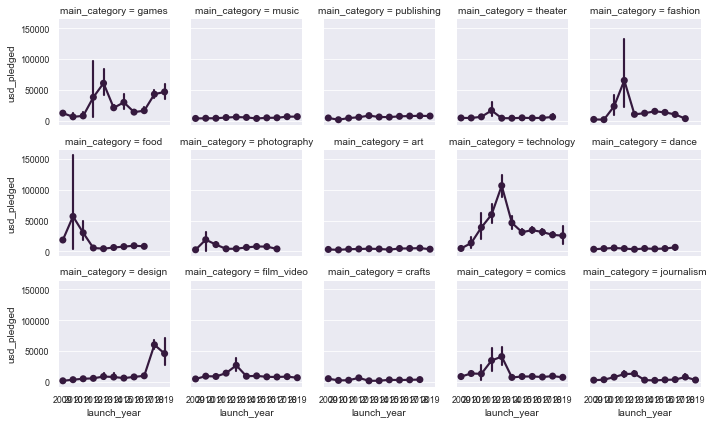

In [133]:
g = sns.FacetGrid(df, col="main_category", col_wrap=5, height=2)
g.map(sns.pointplot, "launch_year", 'usd_pledged', cmap="magma", xlim=(2010,2018))
#g.set_xticklabels()

### usd pledged per backers

**Note:**

At this point the question arises, what is more relevant for the success of a project: the number of backers or the amount of money pledged by each backer?

We will begin by taking a look at median amount of money pledged per backer per project state and will continue examining the median backer count per project state. 

Lastly, we will visualize the distribution of the backer count in dependence of the state in a histogram. 


In [140]:
df["usd_per_backer"] = df["usd_pledged"]/df["backers_count"]
df.groupby(by = ['state'])["usd_per_backer"].median()

state
failed        30.0
successful    61.8
Name: usd_per_backer, dtype: float64

In [142]:
df.groupby(by = 'state')["backers_count"].median()

state
failed         3
successful    68
Name: backers_count, dtype: int64

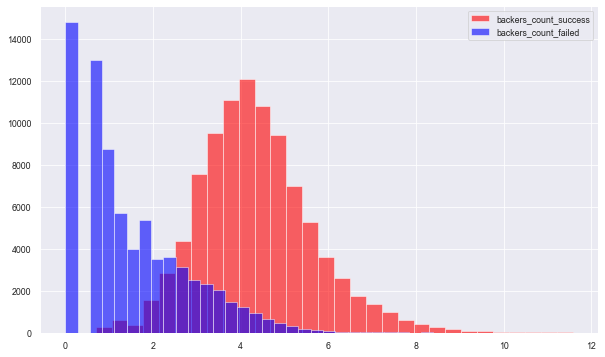

In [156]:
plt.figure(figsize=(10,6))

ax2 = df[df["state"]=="successful"]['backers_count'].apply(lambda x: x+1).apply(np.log).hist(bins=30, color='red', label='backers_count_success', alpha=0.6)
ax3 =df[df["state"]=="failed"]['backers_count'].apply(lambda x: x+1).apply(np.log).hist(bins=30, color='blue', label='backers_count_failed', alpha=0.6)

plt.legend()

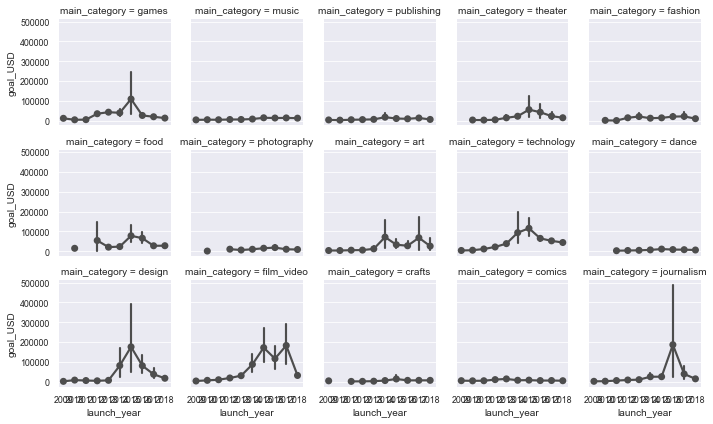

In [166]:
g = sns.FacetGrid(df, col="main_category", col_wrap=5, height=2)
g.map(sns.pointplot, "launch_year", 'goal_USD', order=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018], color=".3")
#g.set_xticklabels()

In [ ]:
sns.factorplot(x ="usd_pledged", col="main_category", data=df, hue='state', kind="median", col_wrap=5);

### median usd pledged per backer per country

<AxesSubplot:xlabel='country'>

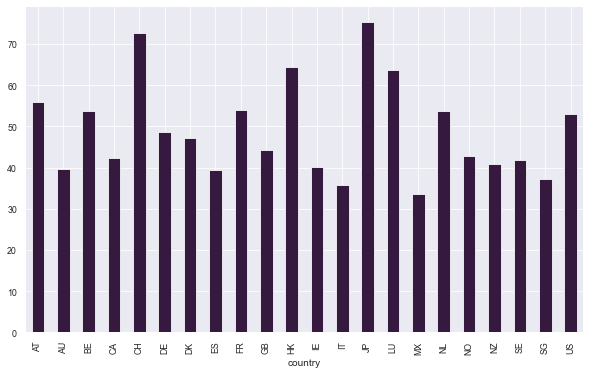

In [175]:
med_pledged_backer_country = df.groupby(by = ['country'])["usd_per_backer"].median()
med_pledged_backer_country.plot(kind="bar", figsize=(10,6))

In [176]:
df["med_pledged_backer_country"] = df.groupby(by = ['country'])["usd_per_backer"].transform("median")

### median usd pledged per backer per category



<AxesSubplot:xlabel='main_category'>

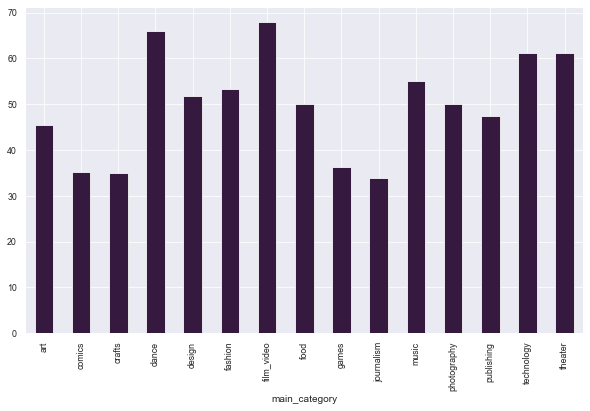

In [178]:
med_pledged_backer_category = df.groupby(by = ['main_category'])["usd_per_backer"].median()
med_pledged_backer_category.plot(kind="bar", figsize=(10,6))

In [180]:
df["med_pledged_backer_category"] = df.groupby(by = ['main_category'])["usd_per_backer"].transform("median")

### median backer count per category

<AxesSubplot:xlabel='main_category'>

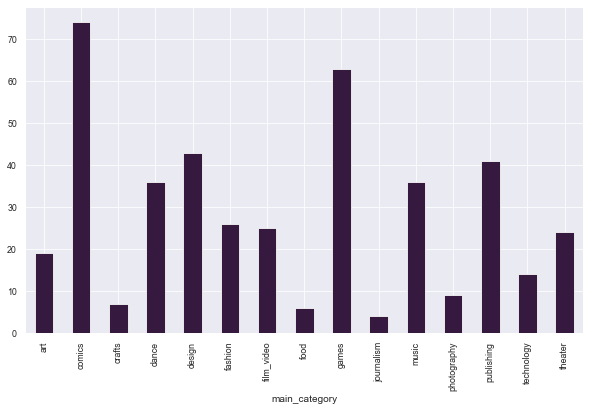

In [182]:
num_backer_category = df.groupby(by = ['main_category'])["backers_count"].median()
num_backer_category.plot(kind="bar", figsize=(10,6))

In [183]:
df["num_backer_category"] = df.groupby(by = ['main_category'])["backers_count"].transform("median")

In [186]:
df.head(1).T

,1
backers_count,47
blurb,A colorful Dia de los Muertos themed oracle de...
converted_pledged_amount,1950
country,US
created_at,2017-08-02 14:28:13
currency,USD
currency_symbol,$
currency_trailing_code,True
current_currency,USD
deadline,2017-09-09 17:00:59


### length of the Project-Description

In [50]:
df["length_blurb"]= df['blurb'].apply(lambda x: len(x))

### wordcount Project-Description

In [51]:
df["word_count_blurb"]= df['blurb'].apply(lambda x: len(x.split()))


### length of the name

In [52]:
df["length_name"]= df['name'].apply(lambda x: len(x))

### wordcount name

In [53]:
df["word_count_name"]= df['name'].apply(lambda x: len(x.split()))


### goal in USD

In [54]:
df["goal_USD"] = (df["static_usd_rate"]*df["goal"])
df["goal_USD"].head()

1     1000.0000
2    15000.0000
3    12160.6569
4     2800.0000
5     3500.0000
Name: goal_USD, dtype: float64

## Preprocessing

* bin goal_USD 
* dummies for categorical data
* scale continuous data
* check for data imbalances/distribution

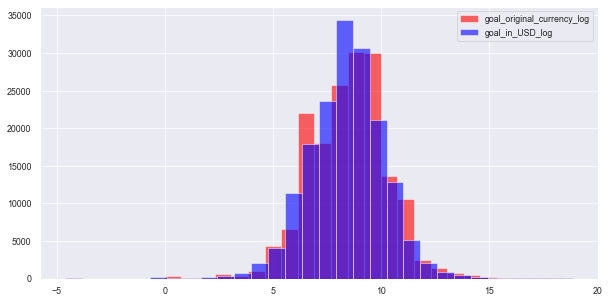

In [55]:
fig = plt.figure(figsize=(10,5))


ax2 = df['goal'].apply(np.log).hist(bins=30, color='red', label='goal_original_currency_log', alpha=0.6)
ax3 = df['goal_USD'].apply(np.log).hist(bins=30, color='blue', label='goal_in_USD_log', alpha=0.6)

plt.legend()

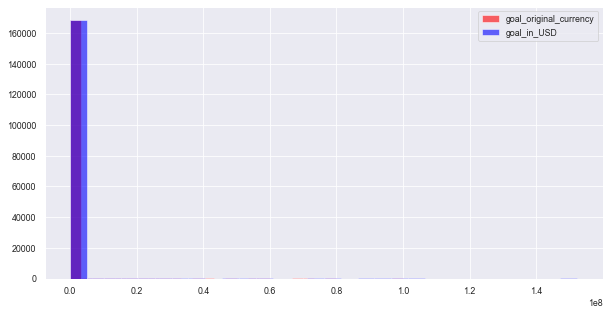

In [56]:
fig = plt.figure(figsize=(10,5))
ax4= df['goal'].hist(bins=30, color='red', label='goal_original_currency', alpha=0.6)
ax5 = df['goal_USD'].hist(bins=30, color='blue', label='goal_in_USD', alpha=0.6)
plt.legend()

Because of the outliers we logarithmize the columns "goal" and "goal_USD.

categorical variables: 

In [57]:
df.head().T

,1,2,3,4,5
backers_count,47,271,3,3,35
blurb,A colorful Dia de los Muertos themed oracle de...,"Electra's long awaited, eclectic Debut Pop/Roc...",The Mist of Tribunal is a turn-based card game...,"Livng with a brain impairment, what its like t...",Annapolis Chamber Players is a non-for profit ...
converted_pledged_amount,1950,22404,165,2820,3725
country,US,US,GB,US,US
created_at,2017-08-02 14:28:13,2012-09-30 06:45:33,2017-01-07 09:11:11,2012-12-06 18:04:31,2014-10-24 17:35:50
currency,USD,USD,GBP,USD,USD
currency_symbol,$,$,£,$,$
currency_trailing_code,True,True,False,True,True
current_currency,USD,USD,USD,USD,USD
deadline,2017-09-09 17:00:59,2013-06-12 05:03:15,2017-03-13 17:22:56,2013-01-09 20:32:07,2015-05-02 02:25:46


In [189]:
base = df[["goal_USD", "backers_count", "country", "currency",
            "staff_pick", "usd_pledged"]]
advanced = df[["goal_USD", "backers_count", "country", 
                "staff_pick", "usd_pledged", 'main_category',
                'sub_category',
                'length_name',
                'word_count_name',
                'campaign_duration',
                'launch_month',
                'deadline_month',
                'launch_weekday',
                'deadline_weekday',
                'launch_year',
                'length_blurb',
                'word_count_blurb',
                'med_pledged_backer_country',
                'med_pledged_backer_category',
                'num_backer_category',
                'projects_month_cat']]

In [60]:
X_base = pd.get_dummies(base, 
               columns= ["country", "currency", "staff_pick"],
               drop_first=True)

In [61]:
X_adv = pd.get_dummies(advanced, 
               columns= ["country", "staff_pick", 'main_category',
                'sub_category',
                'launch_month',
                'deadline_month',
                'launch_weekday',
                'deadline_weekday',
                'launch_year'],
               drop_first=True)

In [190]:
X_base.columns

Index(['goal_USD', 'backers_count', 'usd_pledged', 'country_AU', 'country_BE',
       'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES',
       'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT',
       'country_JP', 'country_LU', 'country_MX', 'country_NL', 'country_NO',
       'country_NZ', 'country_SE', 'country_SG', 'country_US', 'currency_CAD',
       'currency_CHF', 'currency_DKK', 'currency_EUR', 'currency_GBP',
       'currency_HKD', 'currency_JPY', 'currency_MXN', 'currency_NOK',
       'currency_NZD', 'currency_SEK', 'currency_SGD', 'currency_USD',
       'staff_pick_True'],
      dtype='object')

In [63]:
y = df["state"].apply(lambda x: 1 if x == "successful" else 0)

In [64]:
y.value_counts()

1    94614
0    74150
Name: state, dtype: int64

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X_base, y, random_state=1)

In [211]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

### check for imbalances

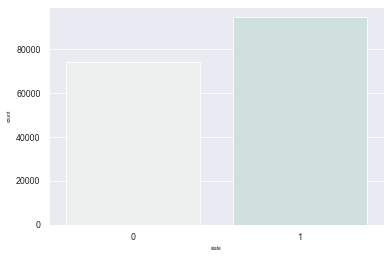

In [67]:
sns.countplot(x = y);

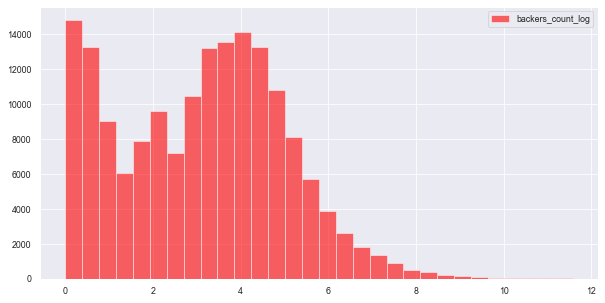

In [68]:
fig = plt.figure(figsize=(10,5))
X_base['backers_count'].apply(lambda x: x+1).apply(np.log).hist(bins=30, color='red', 
                             label='backers_count_log', alpha=0.6)

plt.legend()

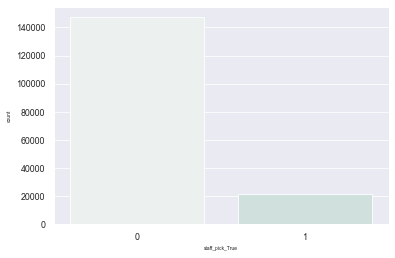

In [69]:
sns.countplot(x = X_base["staff_pick_True"]);

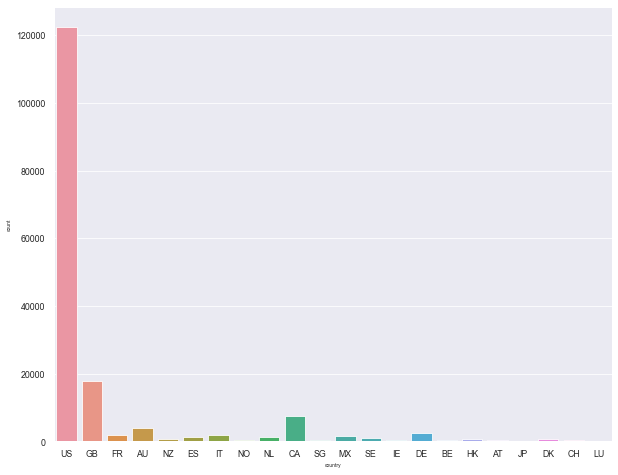

In [70]:
plt.figure(figsize=(10,8))
sns.countplot(x = base["country"]);

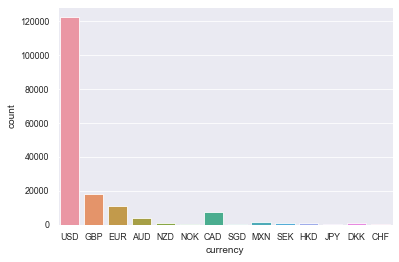

In [161]:
sns.countplot(x = base["currency"]);

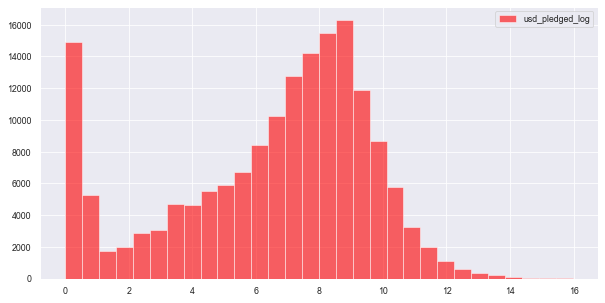

In [160]:
fig = plt.figure(figsize=(10,5))
X_base['usd_pledged'].apply(lambda x: x+1).apply(np.log).hist(bins=30, color='red', 
                                         label='usd_pledged_log', alpha=0.6)

plt.legend();

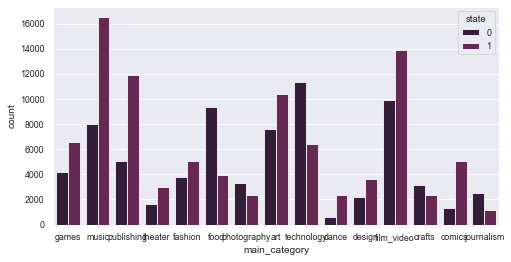

In [199]:
plt.figure(figsize=(8,4))
sns.countplot(x = advanced["main_category"], hue=y);

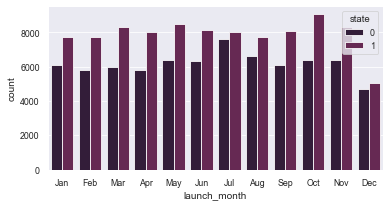

In [196]:
plt.figure(figsize=(6,3))
ax=sns.countplot(x = advanced["launch_month"], hue=y)
ax.set_xticklabels(list(calendar.month_abbr)[1:13]);

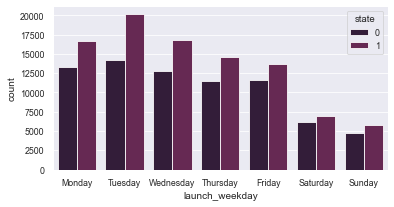

In [195]:
plt.figure(figsize=(6,3))
ax=sns.countplot(x = advanced["launch_weekday"], hue=y)
ax.set_xticklabels(list(calendar.day_name));

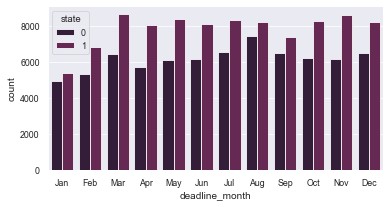

In [194]:
plt.figure(figsize=(6,3))
ax=sns.countplot(x = advanced["deadline_month"], hue=y)
ax.set_xticklabels(list(calendar.month_abbr)[1:13]);

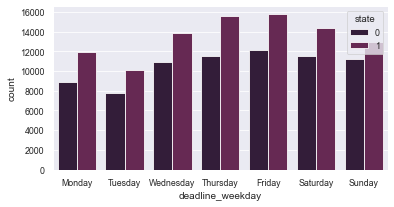

In [193]:

plt.figure(figsize=(6,3))
ax=sns.countplot(x = advanced["deadline_weekday"], hue=y)
ax.set_xticklabels(list(calendar.day_name));

## Predictions

With our model we strive to optimize the precision score. We do this to avoid wrong expectations about the success. In other words we perceive predicting a failed campaign as succesful to be worse then the other way around.
The accuracy score should be another informative metric for the prediction because of more or less balanced distribution of the label.

###  Base model

For the base model, we will be applying the following models:
1. **Logistic regression**
2. **tree-based models (RandomForest, AdaBoost, XGBoost)**
3. **(Naive Bayes)** --> optional
4. **Support Vector Machines** --> we will probably need to resample due to the large data set
5. **(KNN)** --> optional

#### Logistic Regression

In [200]:
from sklearn.linear_model import LogisticRegression

In [208]:
log = LogisticRegression(random_state=42,
                         max_iter=100000)

In [209]:
log.fit(X_train, y_train)

LogisticRegression(max_iter=100000, random_state=42)

In [212]:
y_pred_log = log.predict(X_test)

In [289]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[1.         0.        ]
 [0.96122526 0.03877474]]


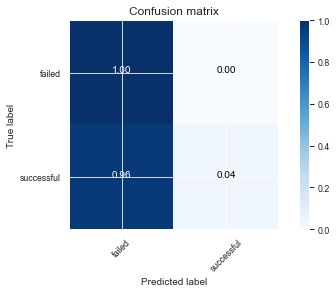

In [290]:
log_matrix = confusion_matrix(y_test, y_pred_log)
plot_confusion_matrix(log_matrix, 
                      classes=['failed','successful'],
                      normalize= True, 
                      title='Confusion matrix')

In [227]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.45      1.00      0.62     18490
           1       1.00      0.04      0.07     23701

    accuracy                           0.46     42191
   macro avg       0.72      0.52      0.35     42191
weighted avg       0.76      0.46      0.31     42191



In [241]:
y_pred_log_prob = log.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred_log_prob[:,1]))

0.5204612658026925


**Observation**:
We see that the logistic regression for the base model performs poorly both in terms of **accuracy** as well as the **recall** score. In addition, the **ROC-AUC** score is barely above a random coin flip. For this case, we will not visualize the result.

The only upside would be that we did not project anybody to be successful who turned out to fail.
Overall, we will turn to other classification models to seek for improvements.

#### Tree-based Models

In this section, we will run through a number of tree-based machine learning models. The first step will be to apply a simple **Decision Tree** model. 

##### Decision Tree 

In [231]:
base_tree = DecisionTreeClassifier()

In [263]:
# We build a function to train and predict our data

from sklearn.metrics import fbeta_score

def train_predict(model, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - model: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    scores = {}
    
    # fit the model to the training data using slicing with 'sample_size'
    model = model.fit(X_train[:sample_size],y_train[:sample_size])
        
    # get predictions on the first 300 training samples
    
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train[:300])
    probabilities_test = model.predict_proba(X_test)
    probabilities_train = model.predict_proba(X_train[:300])
    
            
    # compute accuracy on the first 300 training samples
    scores['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    # compute accuracy on test set
    scores['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # compute F-score on the the first 300 training samples
    scores['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    # compute F-score on the test set
    scores['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
     # compute roc-auc score on the the first 300 training samples
    scores['roc_auc_train'] = roc_auc_score(y_train[:300],probabilities_train[:,1], average=None)
        
    # compute roc-auc score on the test set
    scores['roc_auc_test'] = roc_auc_score(y_test,probabilities_test[:,1], average=None)
    
    # Success
    print ("{} trained on {} samples.".format(model.__class__.__name__, sample_size))
        
    # Return the results
    return scores

In [264]:
# Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Initialize the five models,
# set random state to 42 so we know how to reproduce the model later
clf_A = DecisionTreeClassifier(random_state=42)
clf_B = RandomForestClassifier(random_state=42)
clf_C = GradientBoostingClassifier(random_state=42)
clf_D = AdaBoostClassifier(random_state=42)
clf_E = XGBClassifier(random_state=42)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 1266 samples.
DecisionTreeClassifier trained on 12657 samples.
DecisionTreeClassifier trained on 126573 samples.
RandomForestClassifier trained on 1266 samples.
RandomForestClassifier trained on 12657 samples.
RandomForestClassifier trained on 126573 samples.
GradientBoostingClassifier trained on 1266 samples.
GradientBoostingClassifier trained on 12657 samples.
GradientBoostingClassifier trained on 126573 samples.
AdaBoostClassifier trained on 1266 samples.
AdaBoostClassifier trained on 12657 samples.
AdaBoostClassifier trained on 126573 samples.
XGBClassifier trained on 1266 samples.
XGBClassifier trained on 12657 samples.
XGBClassifier trained on 126573 samples.


In [265]:
for i in results.items():
    print (i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

DecisionTreeClassifier


,1%,10%,100%
acc_test,0.649191,0.774644,0.827285
acc_train,1.000000,1.000000,1.000000
f_test,0.666849,0.757829,0.805476
f_train,1.000000,1.000000,1.000000
roc_auc_test,0.599757,0.743578,0.804701
roc_auc_train,1.000000,1.000000,1.000000


RandomForestClassifier


,1%,10%,100%
acc_test,0.649191,0.649191,0.680050
acc_train,1.000000,1.000000,1.000000
f_test,0.666849,0.666849,0.686993
f_train,1.000000,1.000000,1.000000
roc_auc_test,0.807010,0.635961,0.841405
roc_auc_train,1.000000,1.000000,1.000000


GradientBoostingClassifier


,1%,10%,100%
acc_test,0.649191,0.674551,0.675191
acc_train,0.996667,0.993333,0.993333
f_test,0.666849,0.683316,0.683742
f_train,0.995423,0.990888,0.990888
roc_auc_test,0.599757,0.744212,0.645985
roc_auc_train,1.000000,1.000000,1.000000


AdaBoostClassifier


,1%,10%,100%
acc_test,0.649191,0.649191,0.649191
acc_train,0.990000,0.990000,0.986667
f_test,0.666849,0.666849,0.666849
f_train,0.986395,0.986395,0.981941
roc_auc_test,0.599757,0.599757,0.599757
roc_auc_train,0.999909,0.998540,0.999225


XGBClassifier


,1%,10%,100%
acc_test,0.649191,0.674172,0.685715
acc_train,0.996667,0.996667,0.996667
f_test,0.666849,0.683064,0.690838
f_train,0.995423,0.995423,0.995423
roc_auc_test,0.599757,0.780882,0.806444
roc_auc_train,1.000000,1.000000,1.000000


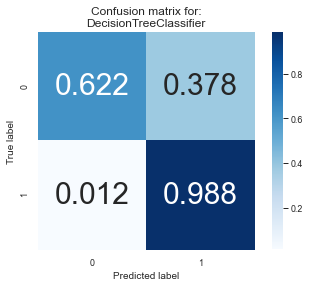

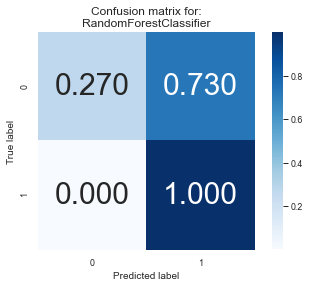

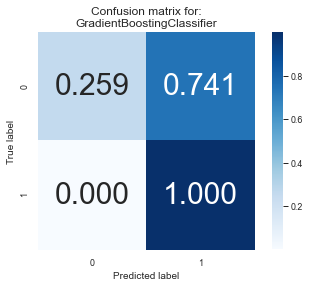

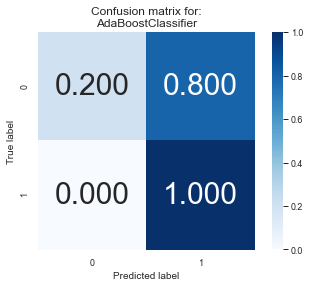

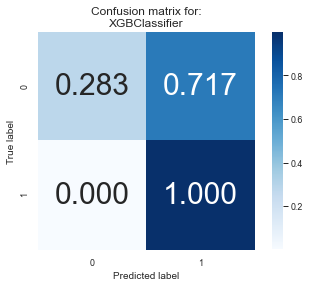

In [266]:
#Visualizing the confusion matrix for each classifier

for i,model in enumerate([clf_A,clf_B,clf_C, clf_D, clf_E]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

    # view with a heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

##### Improve the Tree-based Models 

In [275]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 15).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_leaf': [5, 10, 20],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=42)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  4.5min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 3, 3, 4, 4,
                                                      4, 4, 5, 5, 5, 5, 6, 6, 6,
                                                      6, 7, 7, 7, 7, 8, 8, 8, 8,
                                                      9, 9, 9, 9, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                             

In [276]:
rs.best_params_

{'n_estimators': 196,
 'min_samples_leaf': 20,
 'max_leaf_nodes': 49,
 'max_features': 0.7,
 'max_depth': 13,
 'bootstrap': True}

In [278]:
best_rf_model = rs.best_estimator_

In [280]:
train_rf_predictions = best_rf_model.predict(X_train)
train_rf_probs = best_rf_model.predict_proba(X_train)[:, 1]

rf_predictions = best_rf_model.predict(X_test)
rf_probs = best_rf_model.predict_proba(X_test)[:, 1]

In [281]:
n_nodes = []
max_depths = []

for ind_tree in best_rf_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 97
Average maximum depth 8


In [284]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33     18490
           1       0.62      1.00      0.76     23701

    accuracy                           0.65     42191
   macro avg       0.81      0.60      0.55     42191
weighted avg       0.78      0.65      0.57     42191



In [287]:
rf_matrix = confusion_matrix(y_test, rf_predictions)

Normalized confusion matrix
[[0.1996755 0.8003245]
 [0.        1.       ]]


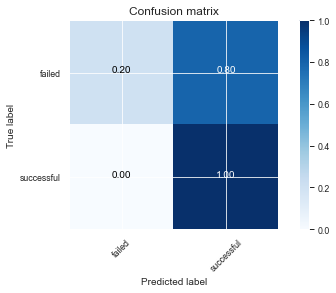

In [291]:
plot_confusion_matrix(rf_matrix, 
                      classes=['failed','successful'],
                      normalize= True, 
                      title='Confusion matrix')

In [ ]:
#def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
#    '''
#    Lightweight script to test many models and find winners
#    :param X_train: training split
#    :param y_train: training target vector
#    :param X_test: test split
#    :param y_test: test target vector
#    :return: DataFrame of predictions
#    '''
#    
#        dfs = []
#    models = [
#              ('LogReg', LogisticRegression()), 
#              ('RF', RandomForestClassifier()),
#              ('KNN', KNeighborsClassifier()),
#              ('SVM', SVC()), 
#              ('GNB', GaussianNB()),
#              ('XGB', XGBClassifier())
#            ]
#    results = []
#        names = []
#        scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
#        target_names = ['malignant', 'benign']
#    for name, model in models:
#            kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
#            cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
#            clf = model.fit(X_train, y_train)
#            y_pred = clf.predict(X_test)
#            print(name)
#            print(classification_report(y_test, y_pred, target_names=target_names))
#            results.append(cv_results)
#            names.append(name)
#            this_df = pd.DataFrame(cv_results)
#            this_df['model'] = name
#            dfs.append(this_df)
#    final = pd.concat(dfs, ignore_index=True)
#    return final

In [ ]:
#bootstraps = []
#for model in list(set(final.model.values)):
#    model_df = final.loc[final.model == model]
#    bootstrap = model_df.sample(n=30, replace=True)
#    bootstraps.append(bootstrap)
#        
#bootstrap_df = pd.concat(bootstraps, ignore_index=True)
#results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
#
### PERFORMANCE METRICS
#results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
#results_long_nofit = results_long_nofit.sort_values(by='values')
### TIME METRICS
#results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
#results_long_fit = results_long_fit.sort_values(by='values')

In [ ]:
#metrics = list(set(results_long_nofit.metrics.values))
#bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

In [258]:
for i in results.items():
    print (i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

DecisionTreeClassifier


,1%,10%,100%
acc_test,0.649191,0.774644,0.827285
acc_train,1.000000,1.000000,1.000000
f_test,0.666849,0.757829,0.805476
f_train,1.000000,1.000000,1.000000
roc_auc_test,0.599757,0.743578,0.804701
roc_auc_train,1.000000,1.000000,1.000000


RandomForestClassifier


,1%,10%,100%
acc_test,0.649191,0.649191,0.680050
acc_train,1.000000,1.000000,1.000000
f_test,0.666849,0.666849,0.686993
f_train,1.000000,1.000000,1.000000
roc_auc_test,0.807010,0.635961,0.841405
roc_auc_train,1.000000,1.000000,1.000000


GradientBoostingClassifier


,1%,10%,100%
acc_test,0.649191,0.674551,0.675191
acc_train,0.996667,0.993333,0.993333
f_test,0.666849,0.683316,0.683742
f_train,0.995423,0.990888,0.990888
roc_auc_test,0.599757,0.744212,0.645985
roc_auc_train,1.000000,1.000000,1.000000


AdaBoostClassifier


,1%,10%,100%
acc_test,0.649191,0.649191,0.649191
acc_train,0.990000,0.990000,0.986667
f_test,0.666849,0.666849,0.666849
f_train,0.986395,0.986395,0.981941
roc_auc_test,0.599757,0.599757,0.599757
roc_auc_train,0.999909,0.998540,0.999225


XGBClassifier


,1%,10%,100%
acc_test,0.649191,0.674172,0.685715
acc_train,0.996667,0.996667,0.996667
f_test,0.666849,0.683064,0.690838
f_train,0.995423,0.995423,0.995423
roc_auc_test,0.599757,0.780882,0.806444
roc_auc_train,1.000000,1.000000,1.000000
